### <b><font color = green|>Exercise 01:</font></b>

Use the indicated method to approximate the solutions to the initial-value problems

$$ f'(x) = y′ = t^{− 2}(sin 2t − 2ty) \space,\space 1 ≤ t ≤ 2, y(1) = 2, h = 0.1\space , has\space actual\space solution\space y(t) = \frac{1}{2}t^{−2}(4 + cos 2 − cos 2t)$$
and compare the results to the actual values.
1. Runge-Kutta third-order method.
2. Heun’s third-order method.
3. Ralston’s third-order method.
4. Third-order Strong Stability Preserving Runge-Kutta.


<b><font color = green|>1. Runge-Kutta third-order method

              t            y        exact        error
0  1.0000000000 2.0000000000 2.0000000000 0.0000000000
1  1.1000000000 1.7338435396 1.7241133391 0.0097302005
2  1.2000000000 1.5155183404 1.5004329441 0.0150853963
3  1.3000000000 1.3317766865 1.3138289695 0.0179477171
4  1.4000000000 1.1739821038 1.1546110980 0.0193710058
5  1.5000000000 1.0363727697 1.0164101467 0.0199626230
6  1.6000000000 0.9150304861 0.8949507694 0.0200797167
7  1.7000000000 0.8072445159 0.7873099232 0.0199345927
8  1.8000000000 0.7111058418 0.6914524043 0.0196534375
9  1.9000000000 0.6252410020 0.6059308692 0.0193101328
10 2.0000000000 0.5486333967 0.5296870980 0.0189462986


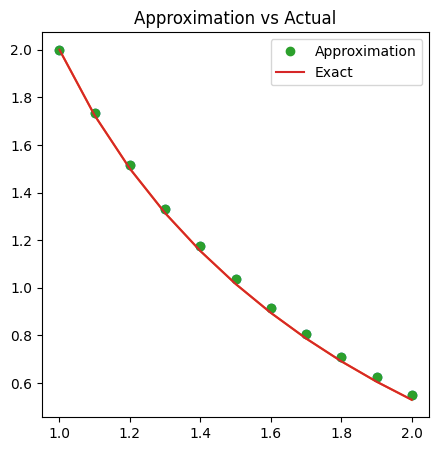

In [3]:
from collections.abc import Callable
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def RungKutta3(f:Callable[[np.float64,np.float64],np.float64],
               t_span:np.ndarray,
               y_int:np.float64,
               n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + h , y[i] + h*k2)
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k3)/6.0 
        
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return t**(-2) * (np.sin(2*t) - 2*t*y)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 2
    n = 10
    df = RungKutta3(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return 0.5*t**(-2) * (4+np.cos(2)-np.cos(2*t))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
  
    plt.title('Approximation vs Actual')
    ax.plot(df.loc[:, 't'], df.loc[:, 'y'], 'o', label='Approximation')
    ax.plot(df.loc[:, 't'], df.loc[:, 'exact'], '-', label='Exact')
    ax.legend()
    plt.show()

<b><font color = green|>2. Heun’s third-order method.

	t		Approximation			Actual
1.0000000000e+00	2.0000000000e+00	2.0000000000e+00
1.1000000000e+00	1.7144562882e+00	1.7241133391e+00
1.2000000000e+00	1.4855980264e+00	1.5004329441e+00
1.3000000000e+00	1.2963182631e+00	1.3138289695e+00
1.4000000000e+00	1.1358413867e+00	1.1546110980e+00
1.5000000000e+00	9.9718345091e-01	1.0164101467e+00
1.6000000000e+00	8.7571321999e-01	8.9495076938e-01
1.7000000000e+00	7.6829921807e-01	7.8730992319e-01
1.8000000000e+00	6.7278423343e-01	6.9145240429e-01
1.9000000000e+00	5.8765073217e-01	6.0593086916e-01
2.0000000000e+00	5.1180189027e-01	5.2968709804e-01


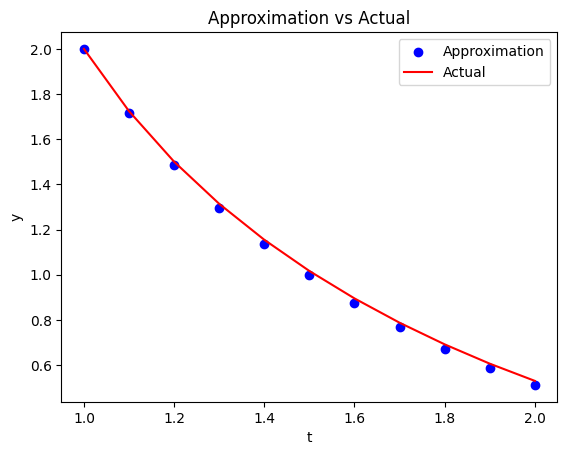

In [4]:
import numpy as np 
def heuns_method(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]

    for i in range(1, N+1):
        t = t_values[i-1]
        y = y_values[i-1]

        k1 = h * f(t, y)
        k2 = h * f(t + h/3, y + k1/3)
        k3 = h * f(t + 2*h/3, y + 2*k2/3)

        t_next = t + h
        y_next = y + (k1 + 4*k2 + k3) / 6

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values


if __name__ == '__main__':
    
    def f(t, y):
       return t**(-2) * (np.sin(2 * t) - 2 * t * y)
   
    # Initial conditions
    t0 = 1
    y0 = 2
    h = 0.1
    N = 10

    # Apply Heun's method
    t_values, y_values = heuns_method(t0, y0, h, N)

    # Compare with actual solution
    def actual_solution(t):
        return 1/(2 * t**2) * (4 + np.cos(2) - np.cos(2 * t))

    actual_values = [actual_solution(t) for t in t_values]

    # Print the results
    print("\tt\t\tApproximation\t\t\tActual")
    for i in range(len(t_values)):
        print(f"{t_values[i]:.10e}\t{y_values[i]:.10e}\t{actual_values[i]:.10e}")
    
    # Plot scatterplot mixed with line plot
    plt.scatter(t_values, y_values, color='blue', label='Approximation')
    plt.plot(t_values, actual_values, color='red', label='Actual')
    
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Approximation vs Actual')
    plt.legend()
    plt.show()


<b><font color = green|>3. Ralston’s third-order method.

	t	Approximation	Actual
1.0000000000	2.0000000000	2.0000000000
1.1000000000	1.7255166497	1.7241133391
1.2000000000	1.5025909811	1.5004329441
1.3000000000	1.3163937292	1.3138289695
1.4000000000	1.1573827195	1.1546110980
1.5000000000	1.0192653830	1.0164101467
1.6000000000	0.8978079685	0.8949507694
1.7000000000	0.7901113287	0.7873099232
1.8000000000	0.6941550085	0.6914524043
1.9000000000	0.6085016196	0.6059308692
2.0000000000	0.5321003646	0.5296870980


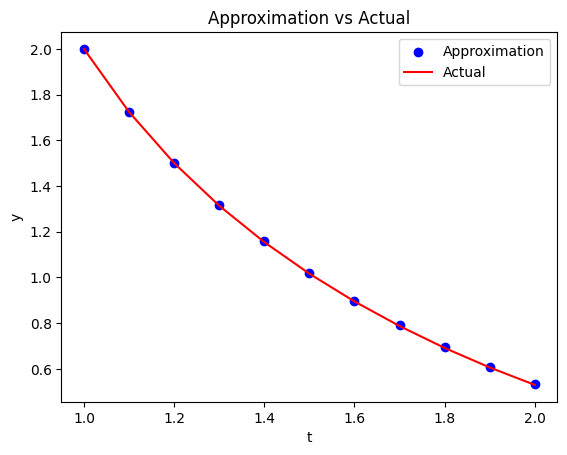

In [5]:
def ralstons_third_order(f, t0, y0, h, num_steps):
    t_values = [t0]
    y_values = [y0]
    
    t = t0
    y = y0
    
    for _ in range(num_steps):
        k1 = f(t, y)
        y_temp = y + (3/4) * h * k1
        k2 = f(t + (2/3) * h, y_temp)
        
        y = y + (1/3) * h * (k1 + 2 * k2)
        t = t + h
        
        t_values.append(t)
        y_values.append(y)
    
    return t_values, y_values


if __name__ == '__main__':
    
    def f(t, y):
        return t**(-2) * (np.sin(2 * t) - 2 * t * y)

    # Initial conditions
    t0 = 1
    y0 = 2
    h = 0.1
    num_steps = 10

    # Apply Ralston's third-order method
    t_values, y_values = ralstons_third_order(f, t0, y0, h, num_steps)

    # Compute actual solution
    def actual_solution(t):
        return 1/(2 * t**2) * (4 + np.cos(2) - np.cos(2 * t))

    actual_values = [actual_solution(t) for t in t_values]

    # Print the results
    print("\tt\tApproximation\tActual")
    for i in range(len(t_values)):
        print(f"{t_values[i]:.10f}\t{y_values[i]:.10f}\t{actual_values[i]:.10f}")
        
    # Plot scatterplot mixed with line plot
    plt.scatter(t_values, y_values, color='blue', label='Approximation')
    plt.plot(t_values, actual_values, color='red', label='Actual')
    
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Approximation vs Actual')
    plt.legend()
    plt.show()

<b><font color = green|>4. Third-order Strong Stability Preserving Runge-Kutta.

	t	Approximation	Actual
1.0000000000	2.0000000000	2.0000000000
1.1000000000	1.7240640003	1.7241133391
1.2000000000	1.5003629904	1.5004329441
1.3000000000	1.3137519776	1.3138289695
1.4000000000	1.1545335466	1.1546110980
1.5000000000	1.0163350623	1.0164101467
1.6000000000	0.8948794604	0.8949507694
1.7000000000	0.7872428360	0.7873099232
1.8000000000	0.6913895581	0.6914524043
1.9000000000	0.6058720812	0.6059308692
2.0000000000	0.5296321004	0.5296870980


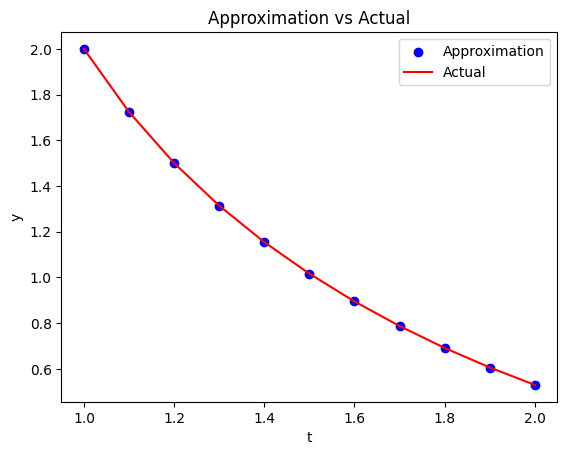

In [6]:
import numpy as np 

def f(t, y):
    return t**(-2) * (math.sin(2 * t) - 2 * t * y)

def ssp_runge_kutta_third_order(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]

    for i in range(1, N+1):
        t = t_values[i-1]
        y = y_values[i-1]

        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h, y - k1 + 2*k2)

        t_next = t + h
        y_next = y + (k1 + 4*k2 + k3) / 6

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

    
if __name__ == '__main__':
    
    # Initial conditions
    t0 = 1
    y0 = 2
    h = 0.1
    N = 10

    # Apply third-order SSP Runge-Kutta method
    t_values, y_values = ssp_runge_kutta_third_order(t0, y0, h, N)

    # Compare with actual solution
    def actual_solution(t):
        return 1/(2 * t**2) * (4 + np.cos(2) - np.cos(2 * t))

    actual_values = [actual_solution(t) for t in t_values]

    # Print the results
    print("\tt\tApproximation\tActual")
    for i in range(len(t_values)):
        print(f"{t_values[i]:.10f}\t{y_values[i]:.10f}\t{actual_values[i]:.10f}")
    
    
    # Plot scatterplot mixed with line plot
    plt.scatter(t_values, y_values, color='blue', label='Approximation')
    plt.plot(t_values, actual_values, color='red', label='Actual')

    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Approximation vs Actual')
    plt.legend()
    plt.show()

### <b><font color = green|>Exercise 02:</font></b>

Use the Runge-Kutta-Fehlberg method with tolerance $ TOL = 10^{−6}
, h_{max} = 0.5, and\space h_{min} = 0.05 $
to approximate the solutions to the following initial-value problems. Compare the results to the actual values.
$$ 1.)\space y′ = \frac{y}{t} − (\frac{y}{t})^2,\space 1 ≤ t ≤ 4 ,\space y(1) = 1 ;\space has\space actual\space solution\space y(t) = \frac{1}{(1 + ln t)} $$

$$ 2.)\space y′ = (2 + 2t^3)y^3 − ty , \space 0 ≤ t ≤ 2, y(0) = \frac{1}{3} ,\space has \space actual\space solution\space y(t) = (3 + 2t^2 + 6e^{t^2})−\frac{1}{2}$$

$ 1.)\space y′ = \frac{y}{t} − (\frac{y}{t})^2,\space 1 ≤ t ≤ 4 ,\space y(1) = 1 \space;\space has\space actual\space solution\space y(t) = \frac{1}{(1 + ln t)} $

	t	Approximation	Actual
1.0000000000	1.0000000000	1.0000000000
1.1101945703	1.0051237268	0.9053581269
1.2191313820	1.0175212074	0.8346279643
1.3572694376	1.0396749316	0.7660047608
1.5290111802	1.0732756720	0.7019409599
1.7470583595	1.1213948500	0.6418759472
2.0286415975	1.1881701537	0.5856973623
2.3994349613	1.2795395769	0.5332669873
2.8985147448	1.4041842624	0.4844495453
3.3985147448	1.5285639134	0.4497740680
3.8985147448	1.6514963160	0.4236218946
4.0000000000	1.6762392508	0.4190597842


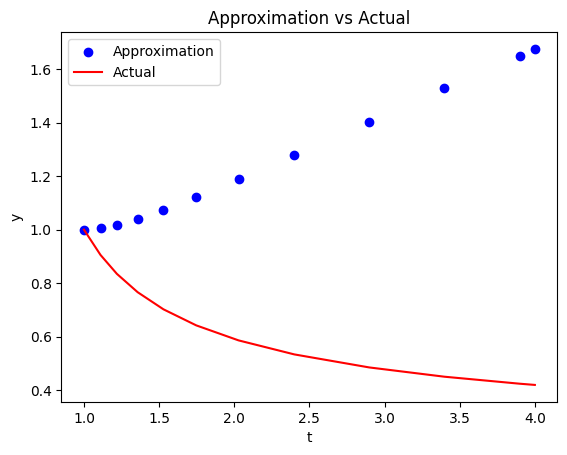

In [7]:
import math

def rkf45(f, t0, y0, h, TOL, hmax, hmin):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0
    
    while t < 4:
        if t + h > 4:
            h = 4 - t
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + 3*h/8, y + 3*k1/32 + 9*k2/32)
        k4 = h * f(t + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * f(t + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * f(t + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55) / h

        if R <= TOL:
            t = t + h
            y = y + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            t_values.append(t)
            y_values.append(y)

        delta = 0.84 * (TOL/R)**0.25
        if delta <= 0.1:
            h = 0.1 * h
        elif delta >= 4:
            h = 4 * h
        else:
            h = delta * h

        if h > hmax:
            h = hmax
        elif h < hmin:
            print("Error: Step size below minimum.")
            break

    return t_values, y_values


if __name__ == '__main__':
    
    def f(t, y):
        return y/t - (y/t)**2
    
    # Initial conditions
    t0 = 1
    y0 = 1
    h = 0.5
    TOL = 1e-6
    hmax = 0.5
    hmin = 0.05

    # Apply RKF45 method
    t_values, y_values = rkf45(f, t0, y0, h, TOL, hmax, hmin)

    # Compute actual solution
    def actual_solution(t):
        return 1/(1 + math.log(t))

    actual_values = [actual_solution(t) for t in t_values]

    print("\tt\tApproximation\tActual")
    for i in range(len(t_values)):
        print(f"{t_values[i]:.10f}\t{y_values[i]:.10f}\t{actual_values[i]:.10f}")
    
    # Plot scatterplot mixed with line plot
    plt.scatter(t_values, y_values, color='blue', label='Approximation')
    plt.plot(t_values, actual_values, color='red', label='Actual')

    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Approximation vs Actual')
    plt.legend()
    plt.show()

$ 2.)\space y′ = (2 + 2t^3)y^3 − ty , \space 0 ≤ t ≤ 2, y(0) = \frac{1}{3} ,\space has \space actual\space solution\space y(t) = (3 + 2t^2 + 6e^{t^2})−\frac{1}{2}$

	t	Approximation	Actual
0.0000000000	0.3333333333	0.3333333333
0.2149834562	0.3422604378	0.3265768396
0.4261550791	0.3365185930	0.3077566831
0.6713359616	0.3126714249	0.2740212440
1.0324605269	0.2527853768	0.2105661835
1.2934689059	0.1998841964	0.1615492673
1.6079133021	0.1359637743	0.1067331514
1.7884145944	0.1031321013	0.0799716903
1.9350933798	0.0799256375	0.0615179940
2.0847792474	0.0599462327	0.0458904593


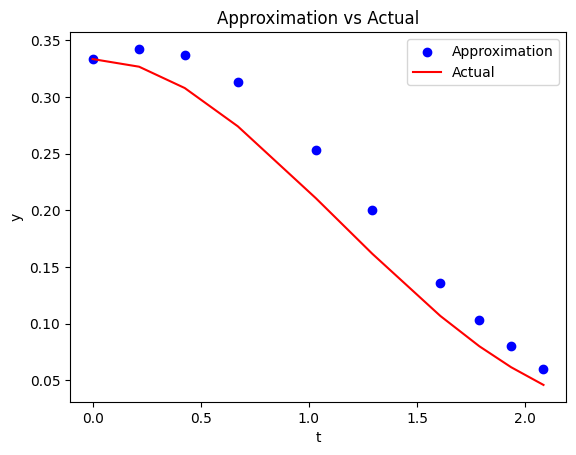

In [8]:
import math

def rkf45(f, t0, y0, h, TOL, hmax, hmin):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0
    
    while t < 2:
        if t + h > 4:
            h = 4 - t
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + 3*h/8, y + 3*k1/32 + 9*k2/32)
        k4 = h * f(t + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * f(t + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * f(t + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55) / h

        if R <= TOL:
            t = t + h
            y = y + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            t_values.append(t)
            y_values.append(y)

        delta = 0.84 * (TOL/R)**0.25
        if delta <= 0.1:
            h = 0.1 * h
        elif delta >= 4:
            h = 4 * h
        else:
            h = delta * h

        if h > hmax:
            h = hmax
        elif h < hmin:
            print("Error: Step size below minimum.")
            break

    return t_values, y_values


if __name__ == '__main__':
    
    def f(t, y):
        return (2 + 2*t**3) * y**3 - t*y 
    
    # Initial conditions
    t0 = 0
    y0 = 1/3
    h = 0.5
    TOL = 1e-6
    hmax = 0.5
    hmin = 0.05

    # Apply RKF45 method
    t_values, y_values = rkf45(f, t0, y0, h, TOL, hmax, hmin)

    # Compute actual solution
    def actual_solution(t):
        return (3 + 2*t**2 + 6*np.exp(t**2))**(-1/2)

    actual_values = [actual_solution(t) for t in t_values]

    print("\tt\tApproximation\tActual")
    for i in range(len(t_values)):
        print(f"{t_values[i]:.10f}\t{y_values[i]:.10f}\t{actual_values[i]:.10f}")
    
    # Plot scatterplot mixed with line plot
    plt.scatter(t_values, y_values, color='blue', label='Approximation')
    plt.plot(t_values, actual_values, color='red', label='Actual')

    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Approximation vs Actual')
    plt.legend()
    plt.show()

# <p style = 'text-align:center'><font color = green|><b>The End